<a href="https://colab.research.google.com/github/nesrinetrimech/Color_Identification/blob/main/Color_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing libraries**

---



In [ ]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

**Reading the image**

In [ ]:
img=cv2.imread('/content/image2.jpg')

**Working with OpenCV**

In [ ]:
print("The type of this input is {}".format(type(img)))

The type of this input is <class 'numpy.ndarray'>


In [ ]:
print("Shape: {}".format(img.shape))

Shape: (730, 996, 3)


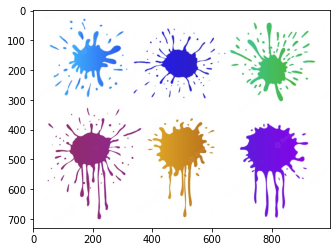

In [ ]:
plt.imshow(img)

In [ ]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

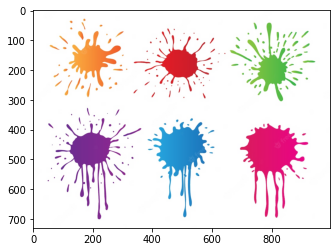

In [ ]:
plt.imshow(img)

In [ ]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

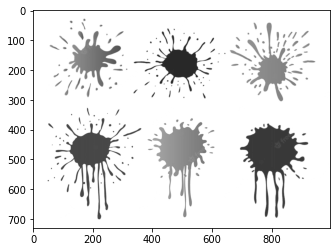

In [ ]:
plt.imshow(gray_img, cmap='gray')

In [ ]:
resized_img = cv2.resize(img, (1200, 600))

**Color Identification**

Convert RGB to hex

In [ ]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

Read the image in RGB

In [ ]:
def get_image(img_path):
    img = cv2.imread('/content/image2.jpg')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

Colors identification from an image

In [ ]:
def get_colors(img, number_of_colors,show_chart):

  modified_image = cv2.resize(img, (600, 400), interpolation = cv2.INTER_AREA)
  modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
  clf = KMeans(n_clusters = number_of_colors)
  labels = clf.fit_predict(modified_image)
  counts = Counter(labels)
  
  center_colors = clf.cluster_centers_
  # We get ordered colors by iterating through the keys
  ordered_colors = [center_colors[i] for i in counts.keys()]
  hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
  rgb_colors = [ordered_colors[i] for i in counts.keys()]

  if (show_chart):
    plt.figure(figsize = (8, 6))
    plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

  return rgb_colors

**Showing the result**

[array([254.51555505, 254.43001103, 254.32310472]),
 array([223.56457521,  21.49994092, 114.10339123]),
 array([207.88109756,  34.20399113,  44.38913526]),
 array([103.54616854, 188.84079813,  75.29908724]),
 array([ 38.8605296 , 141.95993345, 203.2322196 ]),
 array([209.84291515, 189.38726224, 190.67086984]),
 array([124.16217089,  48.04361169, 143.56969795]),
 array([241.17314931, 140.16164785,  64.44186533])]

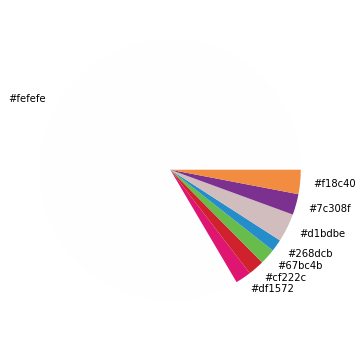

In [ ]:
get_colors(get_image('sample_image.jpg'), 8, True)